In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
batch_size = 32

img_height = 150

img_width = 150

train_dir = "./train"
test_dir = "./test"
valid_dir= "./valid"

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=None,
  subset= None,
  seed= 42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 70626 files belonging to 450 classes.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  valid_dir,
  validation_split=None ,
  subset= None,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2250 files belonging to 450 classes.


In [5]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  validation_split=None,
  subset=None,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2250 files belonging to 450 classes.


In [6]:
bird_true_labels = train_ds.class_names

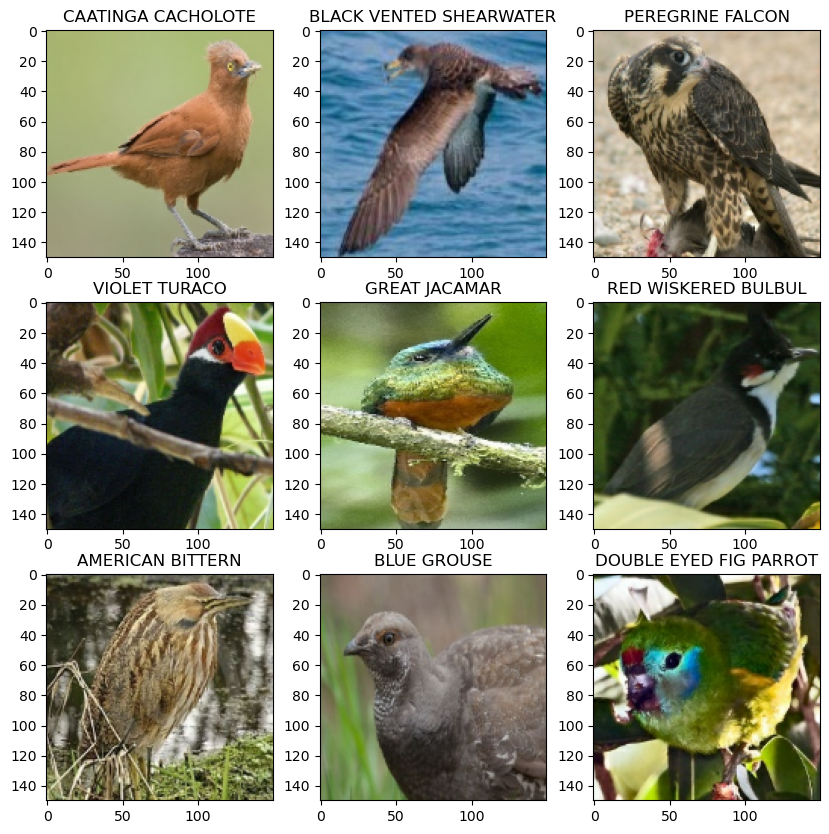

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(bird_true_labels[labels[i]])

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(bird_true_labels))
])

In [13]:
model.compile(optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [14]:
m_tf = model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
2208/2208 [==============================] - 46s 19ms/step - loss: 4.5649 - accuracy: 0.1361 - val_loss: 2.9543 - val_accuracy: 0.3418
Epoch 2/10
2208/2208 [==============================] - 41s 19ms/step - loss: 2.6444 - accuracy: 0.4130 - val_loss: 2.1685 - val_accuracy: 0.4942
Epoch 3/10
2208/2208 [==============================] - 42s 19ms/step - loss: 1.8924 - accuracy: 0.5574 - val_loss: 2.0609 - val_accuracy: 0.5267
Epoch 4/10
2208/2208 [==============================] - 42s 19ms/step - loss: 1.3815 - accuracy: 0.6619 - val_loss: 2.1823 - val_accuracy: 0.5431
Epoch 5/10
2208/2208 [==============================] - 42s 19ms/step - loss: 0.9798 - accuracy: 0.7481 - val_loss: 2.5903 - val_accuracy: 0.5244
Epoch 6/10
2208/2208 [==============================] - 42s 19ms/step - loss: 0.6907 - accuracy: 0.8139 - val_loss: 3.1552 - val_accuracy: 0.5120
Epoch 7/10
2208/2208 [==============================] - 44s 20ms/step - loss: 0.5016 - accuracy: 0.8582 - val_loss: 3.5807 -

In [16]:
accuracy = m_tf.history['accuracy']

validation_accuracy = m_tf.history['val_accuracy']

loss = m_tf.history['loss']

validation_loss = m_tf.history['val_loss']

Text(0.5, 1.0, 'Training & Validation Loss')

<Figure size 2000x2000 with 0 Axes>

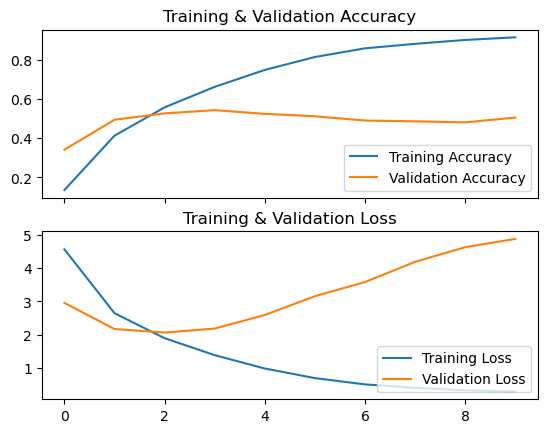

In [30]:
plt.figure(figsize=(20,20))

fig, ax = plt.subplots(nrows=2, ncols=1, sharex = True)

ax[0].plot(range(10), accuracy, label = 'Training Accuracy')
ax[0].plot(range(10), validation_accuracy, label = 'Validation Accuracy')
ax[0].legend(loc = 'lower right')
ax[0].set_title('Training & Validation Accuracy')

ax[1].plot(range(10), loss, label = 'Training Loss')
ax[1].plot(range(10), validation_loss, label = 'Validation Loss')
ax[1].legend(loc = 'lower right')
ax[1].set_title('Training & Validation Loss')

In [32]:
m_tf.model.evaluate(train_ds, verbose=True)

2208/2208 [==============================] - 26s 12ms/step - loss: 0.5700 - accuracy: 0.8551


[0.5700304508209229, 0.8551099896430969]

In [33]:
m_tf.model.evaluate(test_ds, verbose=True)

71/71 [==============================] - 2s 30ms/step - loss: 4.4593 - accuracy: 0.5258


[4.459262371063232, 0.5257777571678162]

In [34]:
m_tf.model.evaluate(val_ds, verbose=True)

71/71 [==============================] - 1s 11ms/step - loss: 4.8790 - accuracy: 0.5053


[4.878994941711426, 0.5053333044052124]